In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("data.csv")

In [3]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [4]:
df["Marital_Status"]

0         0
1         0
2         0
3         0
4         0
         ..
550063    1
550064    0
550065    1
550066    0
550067    1
Name: Marital_Status, Length: 550068, dtype: int64

In [5]:
df["Marital_Status"].unique()

array([0, 1], dtype=int64)

In [6]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


# Handling Outlire

In [7]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


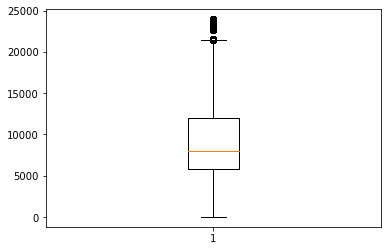

In [8]:
plt.boxplot(df.Purchase)
plt.show()

In [9]:
q1=df.Purchase.quantile(0.25)
q3=df.Purchase.quantile(0.75)
iqr=q3-q1
LL=q1-1.5*iqr
ul=q3+1.5*iqr

In [10]:
print(LL," ",ul)

-3523.5   21400.5


In [11]:
#df.Purchase[df.Purchase > ul]=medain

In [12]:
import warnings
warnings.filterwarnings("ignore")
df.Purchase[df.Purchase > ul]=ul #replace outlier with ul

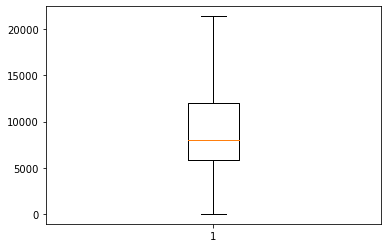

In [13]:
plt.boxplot(df.Purchase)
plt.show()

In [14]:
#df.Purchase.clip(upper=ul,inplace=True) sabai outlier lai phaldinxa

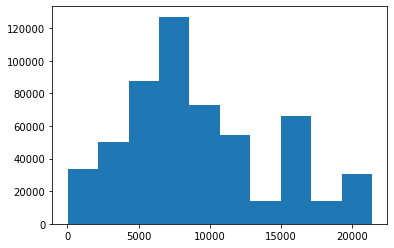

In [15]:
plt.hist(df.Purchase)
plt.show()

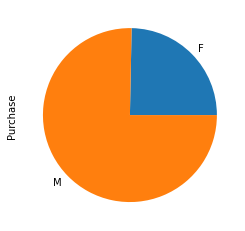

In [16]:
df.groupby("Gender").count().Purchase.plot(kind="pie")
plt.show()

In [17]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


<AxesSubplot:xlabel='City_Category'>

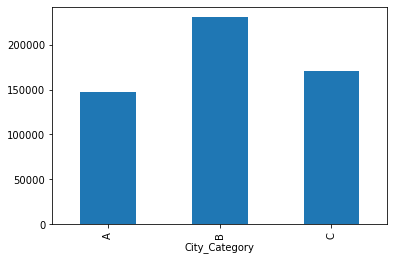

In [18]:
df.groupby("City_Category").count().Purchase.plot(kind="bar")

<AxesSubplot:ylabel='Purchase'>

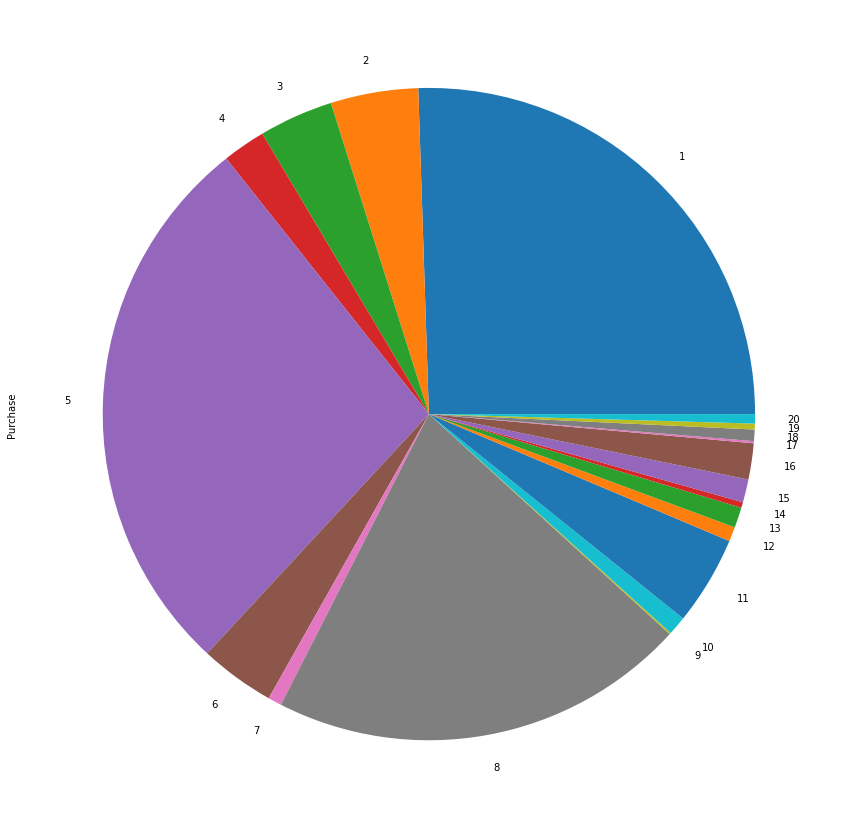

In [19]:
plt.figure(figsize=(20,15))
df.groupby("Product_Category_1").count().Purchase.plot(kind="pie")

<AxesSubplot:xlabel='Age'>

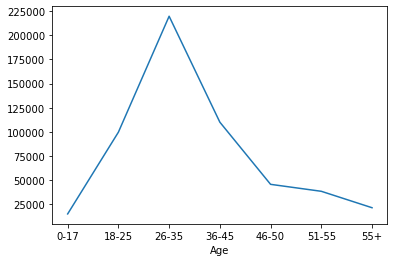

In [20]:
df.groupby("Age").count().Purchase.plot(kind="line")

In [21]:
import seaborn as sns

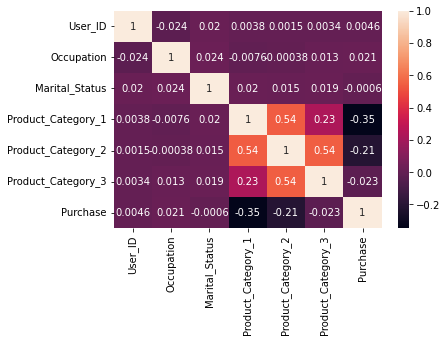

In [22]:
df.corr()

#df.select_dtypes(["float64","int64"]).corr()
sns.heatmap(df.corr(),annot=True)
plt.show()

In [23]:
pd.crosstab(df.Age,df.Gender) #both data should be catagorical data 

Gender,F,M
Age,,
0-17,5083,10019
18-25,24628,75032
26-35,50752,168835
36-45,27170,82843
46-50,13199,32502
51-55,9894,28607
55+,5083,16421


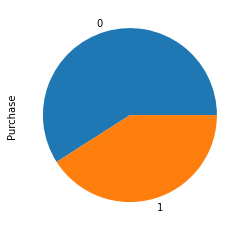

In [24]:
df.groupby("Marital_Status").Purchase.sum().plot(kind="pie")
plt.show()

<AxesSubplot:xlabel='Gender', ylabel='Age'>

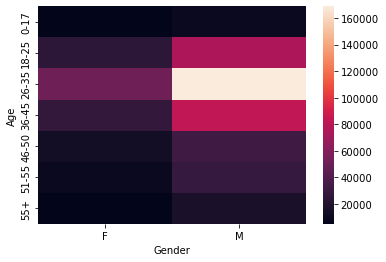

In [25]:
 sns.heatmap(pd.crosstab(df.Age,df.Gender))

# Purshase :Normality Test

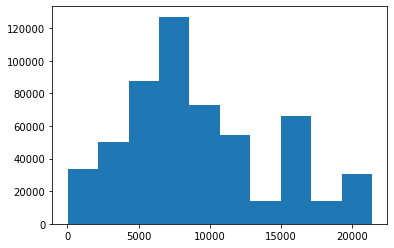

In [26]:
plt.hist(df.Purchase)
plt.show()

In [27]:
import statsmodels.api as sm

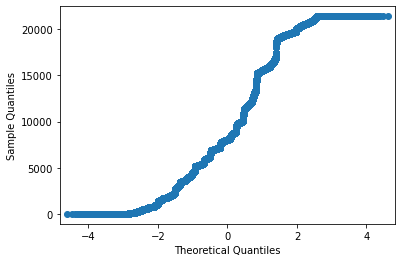

In [28]:
sm.qqplot(df.Purchase)
plt.show()

In [29]:
from scipy.stats import shapiro

In [30]:
shapiro(df.Purchase)

ShapiroResult(statistic=0.9515023827552795, pvalue=0.0)

In [31]:
from scipy.stats import kstest

In [32]:
kstest(df.Purchase, "norm")

KstestResult(statistic=1.0, pvalue=0.0)

In [33]:
df.head(1)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0


In [34]:
from scipy.stats import pearsonr

In [35]:
pearsonr(df.Occupation,df.Purchase)

(0.020853257130511428, 5.723677680975472e-54)

In [36]:
df.corr()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.023971,0.020443,0.003825,0.001529,0.003419,0.004608
Occupation,-0.023971,1.000000,0.024280,-0.007618,-0.000384,0.013263,0.020853
Marital_Status,0.020443,0.024280,1.000000,0.019888,0.015138,0.019473,-0.000599
Product_Category_1,0.003825,-0.007618,0.019888,1.000000,0.540583,0.229678,-0.347413
Product_Category_2,0.001529,-0.000384,0.015138,0.540583,1.000000,0.543649,-0.213074
Product_Category_3,0.003419,0.013263,0.019473,0.229678,0.543649,1.000000,-0.023349
Purchase,0.004608,0.020853,-0.000599,-0.347413,-0.213074,-0.023349,1.000000
